In [ ]:
import re
import pandas as pd

#read the text file
path = "/content/WhatsApp Chat with 5 yrs together (1).txt"
f = open(path, 'r', encoding='utf-8')
data = f.read()
print(data)
print(type(data))

#regular expression to find the dates
pattern = '(\d{1,2}/\d{1,2}/\d{2}),\s(\d{1,2}:\d{2})\s(am|pm)\s-\s([^\:]+):\s(.*)'

#pass the pattern and data to split it to get the list of messages
messages = re.split(pattern, data)[1:]
print(messages)

#extract all dates
dates = re.findall(pattern, data)
print(dates)

df = pd.DataFrame(dates, columns=['date', 'time', 'period', 'phone_number', 'message'])

# Combine the 'date', 'time', and 'period' columns to create the 'datetime' column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'] + ' ' + df['period'], format='%d/%m/%y %I:%M %p')

# Display the DataFrame
df.head()


10/16/20, 14:33 - Ankitha: Dec 1 it will start most prolly
10/16/20, 14:33 - Ankitha: Then vacation🥳🥳
10/16/20, 14:34 - Pranav: And the fun part is , we have an evaluation next week
10/16/20, 14:34 - Abhay: Is next sem also going to be online
10/16/20, 14:34 - Dhruva: now its about endsem
10/16/20, 14:34 - Dhruva: what are we gonna do
10/16/20, 14:34 - Abhay: Lab ?
10/16/20, 14:34 - Pranav: Not yet decided apparently
10/16/20, 14:34 - Dhanushka: Vacation...mostly likely free from online classss🥳🥳🙌🏻
10/16/20, 14:34 - Dhruva: all of you join discxord server
10/16/20, 14:34 - Dhruva: we will discuss
10/16/20, 14:34 - Abhay: I can’t take it bro wth
10/16/20, 14:34 - Dhruva: now
10/16/20, 14:34 - Pranav: Yeah linked lists she was saying laaa I guess that’s lab
10/16/20, 14:34 - Dhanushka: Y there?
10/16/20, 14:34 - Dhruva: now
10/16/20, 14:34 - Dhruva: instead of typing
10/16/20, 14:34 - Ankitha: We won't get
10/16/20, 14:35 - Dhruva: hands are gonna pain typing
10/16/20, 14:35 - Dhruva: di

,date,time,period,phone_number,message,datetime


In [ ]:
import re
import pandas as pd

# Read the text file
path = "/content/WhatsApp Chat with 5 yrs together (1).txt"
with open(path, 'r', encoding='utf-8') as f:
    data = f.readlines()

# Regular expression to find the date, time, sender, and message
pattern = '(\d{1,2}/\d{1,2}/\d{2}),\s(\d{1,2}:\d{2})\s-\s([^\:]+):\s(.*)'

# Initialize lists to store extracted information
dates, times, senders, messages = [], [], [], []

# Process each line of the data
for line in data:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        dates.append(date)
        times.append(time)
        senders.append(sender)
        messages.append(message)

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'time': times, 'sender': senders, 'message': messages})

# Convert the 'date' column to datetime type
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%m/%d/%y %H:%M')

# Drop the separate 'date' and 'time' columns if you don't need them anymore
df.drop(columns=['date', 'time'], inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display the DataFrame
df


,sender,message,datetime
0,Ankitha,Dec 1 it will start most prolly,2020-10-16 14:33:00
1,Ankitha,Then vacation🥳🥳,2020-10-16 14:33:00
2,Pranav,"And the fun part is , we have an evaluation ne...",2020-10-16 14:34:00
3,Abhay,Is next sem also going to be online,2020-10-16 14:34:00
4,Dhruva,now its about endsem,2020-10-16 14:34:00
...,...,...,...
39860,Pranav,I’ll put it as a poll,2023-07-14 22:40:00
39861,Pranav,Do vote which dates suit you better,2023-07-14 22:40:00
39862,Pranav,POLL:,2023-07-14 22:41:00
39863,Pranav,Sir needs to give these dates by night so plea...,2023-07-14 22:44:00


In [ ]:
df['only_date'] = df['datetime'].dt.date
df['year'] = df['datetime'].dt.year
df['month_num'] = df['datetime'].dt.month
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df['day_name'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

In [ ]:
#add period column that shows data capture between which 24 hour format
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period
df.head()

,sender,message,datetime,only_date,year,month_num,month,day,day_name,hour,minute,period
0,Ankitha,Dec 1 it will start most prolly,2020-10-16 14:33:00,2020-10-16,2020,10,October,16,Friday,14,33,14-15
1,Ankitha,Then vacation🥳🥳,2020-10-16 14:33:00,2020-10-16,2020,10,October,16,Friday,14,33,14-15
2,Pranav,"And the fun part is , we have an evaluation ne...",2020-10-16 14:34:00,2020-10-16,2020,10,October,16,Friday,14,34,14-15
3,Abhay,Is next sem also going to be online,2020-10-16 14:34:00,2020-10-16,2020,10,October,16,Friday,14,34,14-15
4,Dhruva,now its about endsem,2020-10-16 14:34:00,2020-10-16,2020,10,October,16,Friday,14,34,14-15


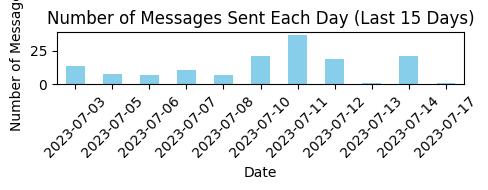

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Read the text file
path = "/content/WhatsApp Chat with 5 yrs together (1).txt"
with open(path, 'r', encoding='utf-8') as f:
    data = f.readlines()

# Regular expression to find the date, time, sender, and message
pattern = '(\d{1,2}/\d{1,2}/\d{2}),\s(\d{1,2}:\d{2})\s-\s([^\:]+):\s(.*)'

# Initialize lists to store extracted information
dates, times, senders, messages = [], [], [], []

# Process each line of the data
for line in data:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        dates.append(date)
        times.append(time)
        senders.append(sender)
        messages.append(message)

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'time': times, 'sender': senders, 'message': messages})

# Convert the 'date' column to datetime type
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%m/%d/%y %H:%M')

# Drop the separate 'date' and 'time' columns if you don't need them anymore
df.drop(columns=['date', 'time'], inplace=True)

# Filter data for the last 15 days
last_15_days = pd.to_datetime('today').date() - pd.to_timedelta(15, unit='D')
df_last_15_days = df[df['datetime'].dt.date >= last_15_days]

# Group data by date and count the messages for each day
daily_message_counts = df_last_15_days.groupby(df_last_15_days['datetime'].dt.date).size()

# Plot the data
plt.figure(figsize=(5, 2))
daily_message_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Sent Each Day (Last 15 Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-36-b02b6560635e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_15_days_df['date'] = last_15_days_df['datetime'].dt.date
<ipython-input-36-b02b6560635e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_15_days_df['hour'] = last_15_days_df['datetime'].dt.hour


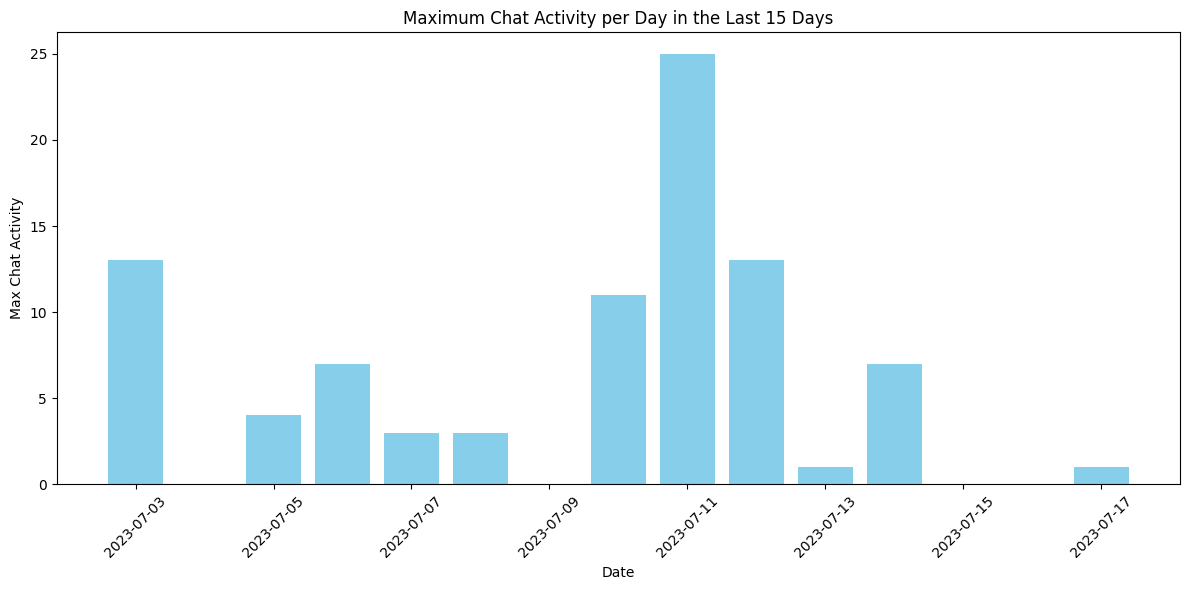

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the last 15 days of data
last_15_days_df = df[df['datetime'] >= df['datetime'].max() - pd.Timedelta(days=15)]

# Extract date and hour from the datetime column
last_15_days_df['date'] = last_15_days_df['datetime'].dt.date
last_15_days_df['hour'] = last_15_days_df['datetime'].dt.hour

# Group the data by date and hour and get the count of messages for each hour
chat_activity = last_15_days_df.groupby(['date', 'hour']).size().reset_index(name='message_count')

# Find the hour with the maximum messages for each day
max_activity_per_day = chat_activity.loc[chat_activity.groupby('date')['message_count'].idxmax()]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(max_activity_per_day['date'], max_activity_per_day['message_count'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Max Chat Activity')
plt.title('Maximum Chat Activity per Day in the Last 15 Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


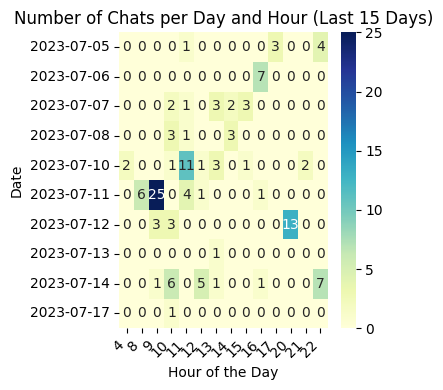

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the text file
path = "/content/WhatsApp Chat with 5 yrs together (1).txt"
with open(path, 'r', encoding='utf-8') as f:
    data = f.readlines()

# Regular expression and data processing (same as your code)
pattern = '(\d{1,2}/\d{1,2}/\d{2}),\s(\d{1,2}:\d{2})\s-\s([^\:]+):\s(.*)'
dates, times, senders, messages = [], [], [], []

for line in data:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        dates.append(date)
        times.append(time)
        senders.append(sender)
        messages.append(message)

df = pd.DataFrame({'date': dates, 'time': times, 'sender': senders, 'message': messages})
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%m/%d/%y %H:%M')
df.drop(columns=['date', 'time'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Filter data for the last 15 days
last_15_days = df[df['datetime'] >= df['datetime'].max() - pd.DateOffset(days=14)]

# Create a new DataFrame containing counts of chats for each day and hour
counts_df = last_15_days.groupby([last_15_days['datetime'].dt.date, last_15_days['datetime'].dt.hour]).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(counts_df, cmap='YlGnBu', annot=True, fmt="d")
plt.title("Number of Chats per Day and Hour (Last 15 Days)")
plt.xlabel("Hour of the Day")
plt.ylabel("Date")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


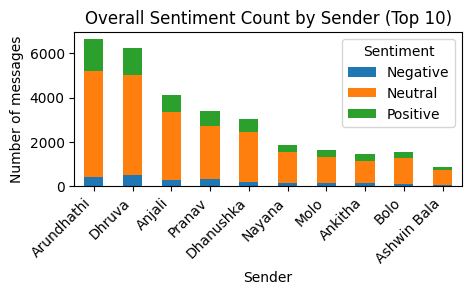

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Add sentiment score to the DataFrame
df['sentiment_score'] = df['message'].apply(get_sentiment_score)

# Function to categorize sentiment into positive, negative, or neutral
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function to create a new column 'sentiment_category'
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Group the data by sender and sentiment and count the occurrences
grouped_sentiments = df.groupby(['sender', 'sentiment_category']).size().unstack(fill_value=0)

# Calculate the total positive, negative, and neutral sentiment count for each sender
grouped_sentiments['Total_Positive'] = grouped_sentiments['Positive']
grouped_sentiments['Total_Negative'] = grouped_sentiments['Negative']
grouped_sentiments['Total_Neutral'] = grouped_sentiments['Neutral']

# Select the top 10 senders with the most positive sentiments
top_10_senders = grouped_sentiments.nlargest(10, 'Total_Positive')

# Plotting the data for top 10 senders
top_10_senders.drop(columns=['Total_Positive', 'Total_Negative', 'Total_Neutral'], inplace=True)
top_10_senders.plot(kind='bar', stacked=True, figsize=(5,2))
plt.xlabel('Sender')
plt.ylabel('Number of messages')
plt.title('Overall Sentiment Count by Sender (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive'])

# Show the
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


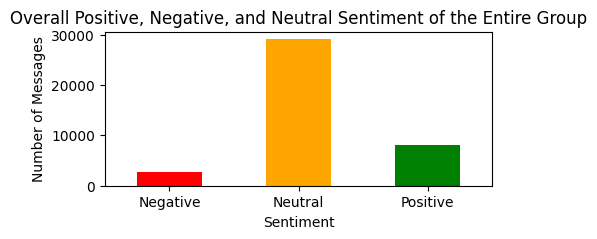

In [ ]:
import re
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Perform Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['message'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral')

# Group the data by sentiment and count the occurrences
grouped_sentiments = df.groupby('sentiment').size()

# Plotting the stacked bar chart for overall sentiment of the entire group
plt.figure(figsize=(5, 2))
colors = {'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'}
grouped_sentiments.plot(kind='bar', color=[colors[sentiment] for sentiment in grouped_sentiments.index], stacked=True)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Messages')
plt.title('Overall Positive, Negative, and Neutral Sentiment of the Entire Group')
plt.xticks(rotation=0)
#plt.legend(loc='upper right', labels=grouped_sentiments.index)

# Show the plot
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Total Messages
df.shape[0]

39865

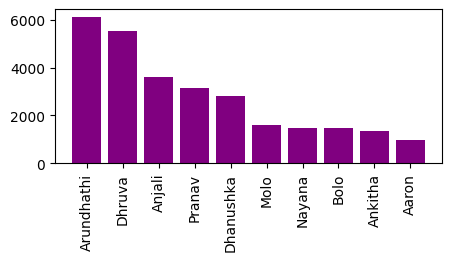

In [ ]:
import matplotlib.pyplot as plt

x = df['sender'].value_counts().head(10)
user_names = x.index
msg_count = x.values

plt.figure(figsize=(5, 2))
plt.bar(user_names, msg_count,color='purple')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
pip install wordcloud

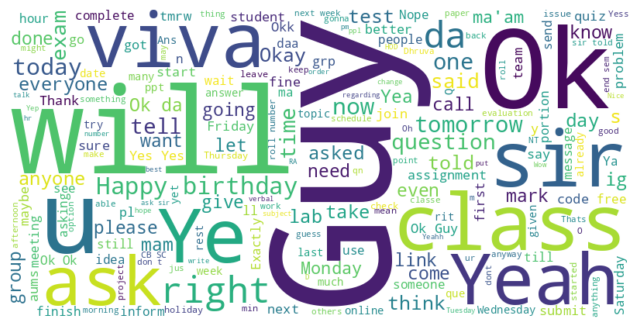

In [ ]:
df = df[~df['message'].str.contains('Media omitted|This message was deleted', na=False)]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['message']))

# Display the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
pip install  emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=24a0c8822d023370311dafe984a69036e2becd34e81f217f01647f93fa8e50f5
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [ ]:
import emoji
from collections import Counter

emojis = []
for message in df['message']:
  emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis)))).head(10)

,0,1
0,😂,4053
1,🥳,1887
2,😭,1658
3,🏻,1046
4,👍,1040
5,🥺,922
6,🤣,786
7,🥲,752
8,🙄,567
9,❤,539


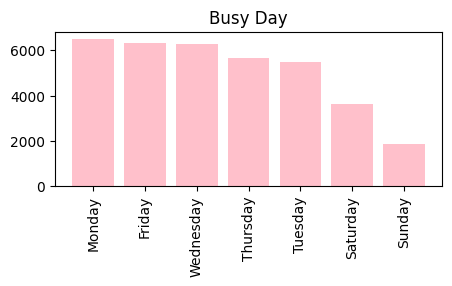

In [ ]:
busy_day = df['day_name'].value_counts()
plt.figure(figsize=(5, 2))
plt.bar(busy_day.index, busy_day.values, color='pink')
plt.title("Busy Day")
plt.xticks(rotation='vertical')
plt.show()

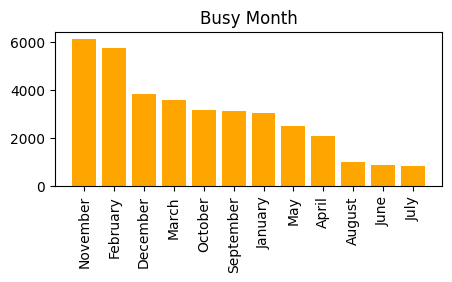

In [ ]:
busy_month = df['month'].value_counts()
plt.figure(figsize=(5, 2))
plt.bar(busy_month.index, busy_month.values, color='orange')
plt.title("Busy Month")
plt.xticks(rotation='vertical')
plt.show()